<center><br><br>
    <h1>Stock Price Forecasting<h2>

### Step 1: Import Libraries

In [1]:
# Import Libraries

import os
import math
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from prettytable import PrettyTable
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### Step 2: Load Datasets

In [2]:
# Load 5 Datasets

sbin_dataset = pd.read_csv("datasets/SBIN.csv")
axis_dataset = pd.read_csv("datasets/AXISBANK.csv")
hdfc_dataset = pd.read_csv("datasets/HDFCBANK.csv")
icici_dataset = pd.read_csv("datasets/ICICIBANK.csv")
kotak_dataset = pd.read_csv("datasets/KOTAKBANK.csv")

### Step 3: Understand Datasets

In [3]:
# Functions to Check Dataset Size

def convert_bytes(num):
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024.0:
            return "%3.1f %s" % (num, x)
        num /= 1024.0

def file_size(file_path):
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)

# Dataset 1

print("\n==============================\n")
print("Name of Dataset:   ", str('SBIN'))
print("Start Date:        ", sbin_dataset.loc[0]['Date'])
print("End Date:          ", sbin_dataset.loc[len(sbin_dataset)-1]['Date'])
print("Number of Rows:    ", len(sbin_dataset))
print("Number of Columns: ", len(sbin_dataset.columns))
print("Size of Dataset:   ", file_size('datasets/SBIN.csv'))

# Dataset 2

print("\n==============================\n")
print("Name of Dataset:   ", str('AXISBANK'))
print("Start Date:        ", axis_dataset.loc[0]['Date'])
print("End Date:          ", axis_dataset.loc[len(axis_dataset)-1]['Date'])
print("Number of Rows:    ", len(axis_dataset))
print("Number of Columns: ", len(axis_dataset.columns))
print("Size of Dataset:   ", file_size('datasets/AXISBANK.csv'))

# Dataset 3

print("\n==============================\n")
print("Name of Dataset:   ", str('HDFCBANK'))
print("Start Date:        ", hdfc_dataset.loc[0]['Date'])
print("End Date:          ", hdfc_dataset.loc[len(hdfc_dataset)-1]['Date'])
print("Number of Rows:    ", len(hdfc_dataset))
print("Number of Columns: ", len(hdfc_dataset.columns))
print("Size of Dataset:   ", file_size('datasets/HDFCBANK.csv'))

# Dataset 4

print("\n==============================\n")
print("Name of Dataset:   ", str('ICICIBANK'))
print("Start Date:        ", icici_dataset.loc[0]['Date'])
print("End Date:          ", icici_dataset.loc[len(icici_dataset)-1]['Date'])
print("Number of Rows:    ", len(icici_dataset))
print("Number of Columns: ", len(icici_dataset.columns))
print("Size of Dataset:   ", file_size('datasets/ICICIBANK.csv'))

# Dataset 5

print("\n==============================\n")
print("Name of Dataset:   ", str('KOTAKBANK'))
print("Start Date:        ", kotak_dataset.loc[0]['Date'])
print("End Date:          ", kotak_dataset.loc[len(kotak_dataset)-1]['Date'])
print("Number of Rows:    ", len(kotak_dataset))
print("Number of Columns: ", len(kotak_dataset.columns))
print("Size of Dataset:   ", file_size('datasets/KOTAKBANK.csv'))



Name of Dataset:    SBIN
Start Date:         2012-07-02
End Date:           2022-07-01
Number of Rows:     2469
Number of Columns:  7
Size of Dataset:    180.6 KB


Name of Dataset:    AXISBANK
Start Date:         2012-07-02
End Date:           2022-07-01
Number of Rows:     2469
Number of Columns:  7
Size of Dataset:    179.2 KB


Name of Dataset:    HDFCBANK
Start Date:         2012-07-02
End Date:           2022-07-01
Number of Rows:     2469
Number of Columns:  7
Size of Dataset:    183.2 KB


Name of Dataset:    ICICIBANK
Start Date:         2012-07-02
End Date:           2022-07-01
Number of Rows:     2469
Number of Columns:  7
Size of Dataset:    180.4 KB


Name of Dataset:    KOTAKBANK
Start Date:         2012-07-02
End Date:           2022-07-01
Number of Rows:     2469
Number of Columns:  7
Size of Dataset:    183.8 KB


### Step 4: Combine Datasets

In [4]:
# Combine all 5 Datasets

keys = ["sbin", "axis", "hdfc", "icici", "kotak"]

sbin_dataset.set_index('Date', inplace=True)
axis_dataset.set_index('Date', inplace=True)
hdfc_dataset.set_index('Date', inplace=True)
icici_dataset.set_index('Date', inplace=True)
kotak_dataset.set_index('Date', inplace=True)

combined_dataset = pd.concat([sbin_dataset, axis_dataset, hdfc_dataset, icici_dataset, kotak_dataset],
                             keys=keys, axis=0, names=['Bank Name', 'Stock Info'])
combined_dataset

Open         High          Low        Close  \
Bank Name Stock Info                                                       
sbin      2012-07-02   216.979996   219.729996   216.000000   218.195007   
          2012-07-03   219.500000   220.399994   217.714996   218.735001   
          2012-07-04   219.009995   222.990005   219.009995   222.479996   
          2012-07-05   221.990005   223.964996   221.210007   223.345001   
          2012-07-06   223.570007   223.570007   220.570007   222.264999   
...                           ...          ...          ...          ...   
kotak     2022-06-27  1717.199951  1719.900024  1685.000000  1691.550049   
          2022-06-28  1684.900024  1692.349976  1664.699951  1668.800049   
          2022-06-29  1650.000000  1658.949951  1636.699951  1642.449951   
          2022-06-30  1632.000000  1676.900024  1631.000000  1661.099976   
          2022-07-01  1645.000000  1679.500000  1636.000000  1667.750000   

                        Adj Close      Volume  
Bank Name Stock Info                           
sbin      2012-07-02   198.754105  23629020.0  
          2012-07-03   199.245987  23044680.0  
          2012-07-04   202.657272  33471910.0  
          2012-07-05   203.445221  18782280.0  
          2012-07-06   202.461441  21904250.0  
...                           ...         ...  
kotak     2022-06-27  1691.550049   2128112.0  
          2022-06-28  1668.800049   2799443.0  
          2022-06-29  1642.449951   2932830.0  
          2022-06-30  1661.099976   3982064.0  
          2022-07-01  1667.750000   2300514.0  

[12345 rows x 6 columns]

### Step 5: Visualize Datasets

In [5]:
# Visualize Datasets

fig = go.Figure()
fig.add_trace(go.Scatter(x=sbin_dataset.index, y=sbin_dataset['Close'], mode='lines', name='SBIN'))
fig.add_trace(go.Scatter(x=axis_dataset.index, y=axis_dataset['Close'], mode='lines', name='AXIS'))
fig.add_trace(go.Scatter(x=hdfc_dataset.index, y=hdfc_dataset['Close'], mode='lines', name='HDFC'))
fig.add_trace(go.Scatter(x=icici_dataset.index, y=icici_dataset['Close'], mode='lines', name='ICICI'))
fig.add_trace(go.Scatter(x=kotak_dataset.index, y=kotak_dataset['Close'], mode='lines', name='KOTAK'))
fig.layout.title.text = "Closing Price of 5 Indian Banks"
fig.show()

# Visualize Combined Dataset

fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(1,len(combined_dataset['Close'].values)+1)], 
                         y=combined_dataset['Close'].values, mode='lines', name='SBIN'))
fig.layout.title.text = "Closing Price of Combined Dataset"
fig.show()

### Step 6: Data Pre-Processing

In [6]:
# Data Pre-Proceesing

scaler_1 = MinMaxScaler(feature_range=(0,1))
df1 = scaler_1.fit_transform(np.array(sbin_dataset['Close']).reshape(-1,1))

scaler_2 = MinMaxScaler(feature_range=(0,1))
df2 = scaler_2.fit_transform(np.array(axis_dataset['Close']).reshape(-1,1))

scaler_3 = MinMaxScaler(feature_range=(0,1))
df3 = scaler_3.fit_transform(np.array(hdfc_dataset['Close']).reshape(-1,1))

scaler_4 = MinMaxScaler(feature_range=(0,1))
df4 = scaler_4.fit_transform(np.array(icici_dataset['Close']).reshape(-1,1))

scaler_5 = MinMaxScaler(feature_range=(0,1))
df5 = scaler_5.fit_transform(np.array(kotak_dataset['Close']).reshape(-1,1))

scaler_6 = MinMaxScaler(feature_range=(0,1))
df6 = scaler_6.fit_transform(np.array(combined_dataset['Close'].values).reshape(-1,1))

In [7]:
# Clean Dataset

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df1 = np.array(clean_dataset(pd.DataFrame(df1)))
df2 = np.array(clean_dataset(pd.DataFrame(df2)))
df3 = np.array(clean_dataset(pd.DataFrame(df3)))
df4 = np.array(clean_dataset(pd.DataFrame(df4)))
df5 = np.array(clean_dataset(pd.DataFrame(df5)))
df6 = np.array(clean_dataset(pd.DataFrame(df6)))

### Step 7: Split Data

In [8]:
# Split Dataset into Training and Testing Dataset

training_size = int(len(df1) * 0.80)
test_size = len(df1)-training_size

# Dataset 1

train_data_1 = df1[0:training_size,:] , 
test_data_1 = df1[training_size:len(df1),:1]

# Dataset 2

train_data_2 = df2[0:training_size,:] , 
test_data_2 = df2[training_size:len(df2),:1]

# Dataset 3

train_data_3 = df3[0:training_size,:] , 
test_data_3 = df3[training_size:len(df3),:1]

# Dataset 4

train_data_4 = df4[0:training_size,:] , 
test_data_4 = df4[training_size:len(df4),:1]

# Dataset 5

train_data_5 = df5[0:training_size,:] , 
test_data_5 = df5[training_size:len(df5),:1]

# Dataset 6

training_size_6 = int(len(df6) * 0.80)
test_size_6 = len(df6)-training_size_6
train_data_6 = df6[0:training_size_6,:] , 
test_data_6 = df6[training_size_6:len(df6),:1]

### Step 8: Get Data Matrix

In [9]:
# Create Dataset

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100

# Dataset 1

X_train_1, y_train_1 = create_dataset(train_data_1[0], time_step)
X_test_1, y_test_1 = create_dataset(test_data_1, time_step)

# Dataset 2

X_train_2, y_train_2 = create_dataset(train_data_2[0], time_step)
X_test_2, y_test_2 = create_dataset(test_data_2, time_step)

# Dataset 3

X_train_3, y_train_3 = create_dataset(train_data_3[0], time_step)
X_test_3, y_test_3 = create_dataset(test_data_3, time_step)

# Dataset 4

X_train_4, y_train_4 = create_dataset(train_data_4[0], time_step)
X_test_4, y_test_4 = create_dataset(test_data_4, time_step)

# Dataset 5

X_train_5, y_train_5 = create_dataset(train_data_5[0], time_step)
X_test_5, y_test_5 = create_dataset(test_data_5, time_step)

# Dataset 6

X_train_6, y_train_6 = create_dataset(train_data_6[0], time_step)
X_test_6, y_test_6 = create_dataset(test_data_6, time_step)

### Step 9: Train Model 1 (Random Forest Regressor)

In [10]:
# Train Random Forest Regressor

# Dataset 1

rf_1 = RandomForestRegressor(n_estimators=100, verbose=1)
rf_1.fit(X_train_1, y_train_1)

# Dataset 2

rf_2 = RandomForestRegressor(n_estimators=100, verbose=1)
rf_2.fit(X_train_2, y_train_2)

# Dataset 3

rf_3 = RandomForestRegressor(n_estimators=100, verbose=1)
rf_3.fit(X_train_3, y_train_3)

# Dataset 4

rf_4 = RandomForestRegressor(n_estimators=100, verbose=1)
rf_4.fit(X_train_4, y_train_4)

# Dataset 5

rf_5 = RandomForestRegressor(n_estimators=100, verbose=1)
rf_5.fit(X_train_5, y_train_5)

# Dataset 6

rf_6 = RandomForestRegressor(n_estimators=100, verbose=1)
rf_6.fit(X_train_6, y_train_6)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomForestRegressor(verbose=1)

### Step 10: Get Predictions with Random Forest Regressor

In [11]:
# Predictions of Data 1

train_predict_1 = rf_1.predict(X_train_1)
test_predict_1 = rf_1.predict(X_test_1)
train_predict_1 = scaler_1.inverse_transform(train_predict_1.reshape(-1, 1))
test_predict_1 = scaler_1.inverse_transform(test_predict_1.reshape(-1, 1))

# Predictions of Data 2

train_predict_2 = rf_2.predict(X_train_2)
test_predict_2 = rf_2.predict(X_test_2)
train_predict_2 = scaler_2.inverse_transform(train_predict_2.reshape(-1, 1))
test_predict_2 = scaler_2.inverse_transform(test_predict_2.reshape(-1, 1))

# Predictions of Data 3

train_predict_3 = rf_3.predict(X_train_3)
test_predict_3 = rf_3.predict(X_test_3)
train_predict_3 = scaler_3.inverse_transform(train_predict_3.reshape(-1, 1))
test_predict_3 = scaler_3.inverse_transform(test_predict_3.reshape(-1, 1))

# Predictions of Data 4

train_predict_4 = rf_4.predict(X_train_4)
test_predict_4 = rf_4.predict(X_test_4)
train_predict_4 = scaler_4.inverse_transform(train_predict_4.reshape(-1, 1))
test_predict_4 = scaler_4.inverse_transform(test_predict_4.reshape(-1, 1))

# Predictions of Data 5

train_predict_5 = rf_5.predict(X_train_5)
test_predict_5 = rf_5.predict(X_test_5)
train_predict_5 = scaler_5.inverse_transform(train_predict_5.reshape(-1, 1))
test_predict_5 = scaler_5.inverse_transform(test_predict_5.reshape(-1, 1))

# Predictions of Data 6

train_predict_6 = rf_5.predict(X_train_6)
test_predict_6 = rf_5.predict(X_test_6)
train_predict_6 = scaler_6.inverse_transform(train_predict_6.reshape(-1, 1))
test_predict_6 = scaler_6.inverse_transform(test_predict_6.reshape(-1, 1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

### Step 11: Calculate Error of Random Foreset Regressor

In [12]:
# Mean Squared Error

# Dataset 1

train_error_1 = math.sqrt(mean_squared_error(y_train_1, train_predict_1))
test_error_1 = math.sqrt(mean_squared_error(y_test_1, test_predict_1))
print("\n===========================")
print("Training Dataset 1:", round(train_error_1,2))
print("Testing Dataset 1: ", round(test_error_1,2))

# Dataset 2

train_error_2 = math.sqrt(mean_squared_error(y_train_2, train_predict_2))
test_error_2 = math.sqrt(mean_squared_error(y_test_2, test_predict_2))
print("\n===========================")
print("Training Dataset 2:", round(train_error_2,2))
print("Testing Dataset 2: ", round(test_error_2,2))

# Dataset 3

train_error_3 = math.sqrt(mean_squared_error(y_train_3, train_predict_3))
test_error_3 = math.sqrt(mean_squared_error(y_test_3, test_predict_3))
print("\n===========================")
print("Training Dataset 3:", round(train_error_3,2))
print("Testing Dataset 3: ", round(test_error_3,2))

# Dataset 4

train_error_4 = math.sqrt(mean_squared_error(y_train_4, train_predict_4))
test_error_4 = math.sqrt(mean_squared_error(y_test_4, test_predict_4))
print("\n===========================")
print("Training Dataset 4:", round(train_error_4,2))
print("Testing Dataset 4: ", round(test_error_4,2))

# Dataset 5

train_error_5 = math.sqrt(mean_squared_error(y_train_5, train_predict_5))
test_error_5 = math.sqrt(mean_squared_error(y_test_5, test_predict_5))
print("\n===========================")
print("Training Dataset 5:", round(train_error_5,2))
print("Testing Dataset 5: ", round(test_error_5,2))

# Dataset 6

train_error_6 = math.sqrt(mean_squared_error(y_train_6, train_predict_6))
test_error_6 = math.sqrt(mean_squared_error(y_test_6, test_predict_6))
print("\n===========================")
print("Training Dataset 6:", round(train_error_6,2))
print("Testing Dataset 6: ", round(test_error_6,2))


Training Dataset 1: 257.87
Testing Dataset 1:  350.65

Training Dataset 2: 512.2
Testing Dataset 2:  719.0

Training Dataset 3: 770.09
Testing Dataset 3:  1276.14

Training Dataset 4: 299.64
Testing Dataset 4:  533.67

Training Dataset 5: 949.48
Testing Dataset 5:  1653.8

Training Dataset 6: 605.45
Testing Dataset 6:  1112.89


### Step 12: Plotting Predictions of Random Forest Regressor

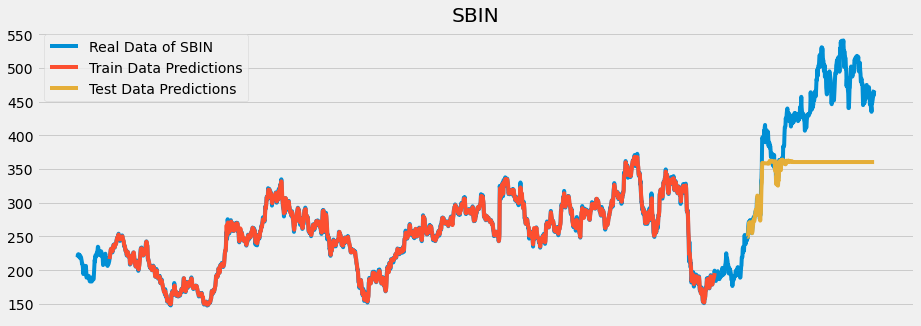

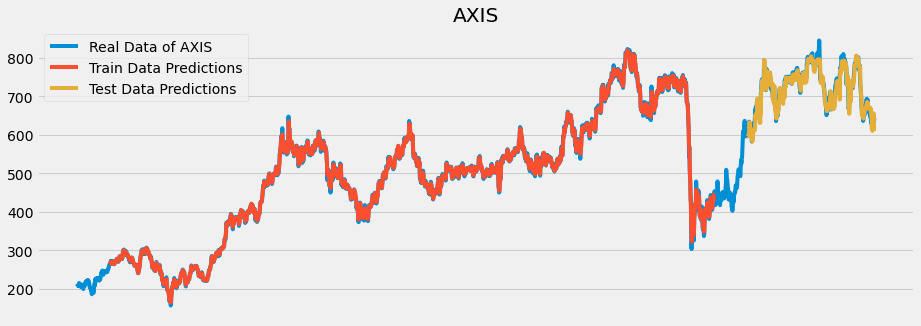

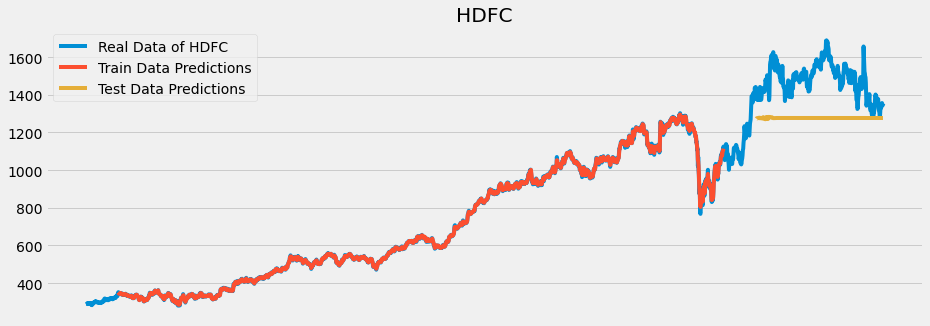

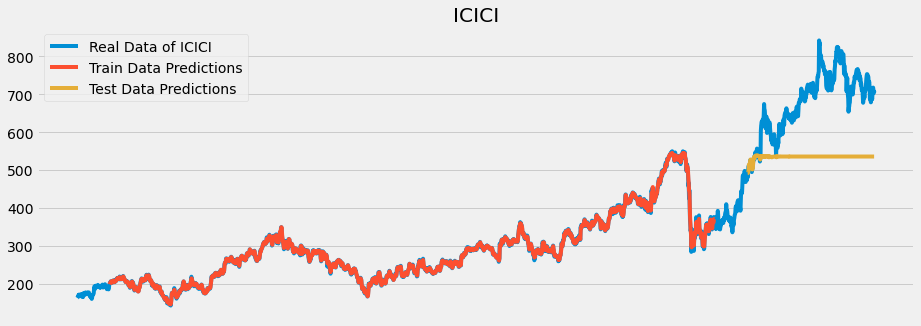

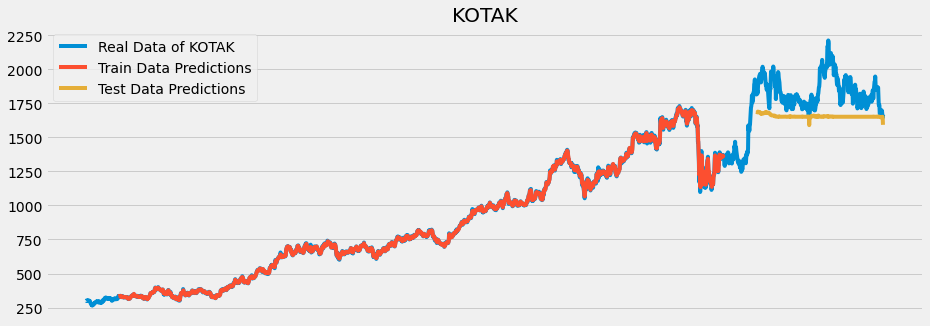

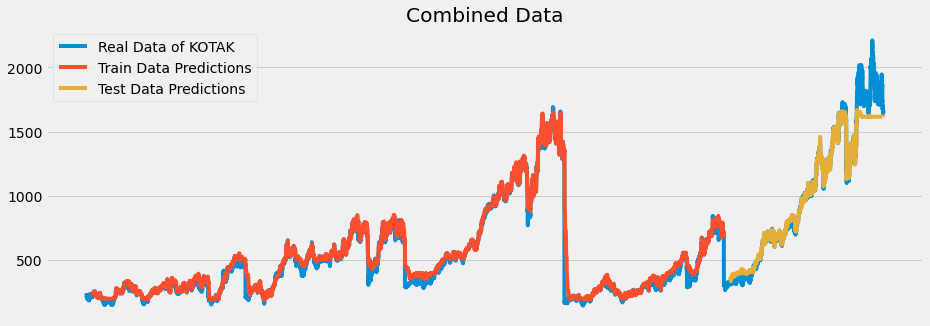

In [13]:
# Plotting 

# Dataset 1

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_1 = np.empty_like(df1)
plotting_train_1[:, :] = np.nan
plotting_train_1[time_step:len(train_predict_1)+time_step, :] = train_predict_1

plotting_test_1 = np.empty_like(df1)
plotting_test_1[:, :] = np.nan
plotting_test_1[len(train_predict_1)+(time_step*2)+1:len(df1)-1, :] = test_predict_1

plt.plot(scaler_1.inverse_transform(df1))
plt.plot(plotting_train_1)
plt.plot(plotting_test_1)
plt.title("SBIN")
plt.legend(['Real Data of SBIN', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

# Dataset 2

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_2 = np.empty_like(df2)
plotting_train_2[:, :] = np.nan
plotting_train_2[time_step:len(train_predict_2)+time_step, :] = train_predict_2

plotting_test_2 = np.empty_like(df2)
plotting_test_2[:, :] = np.nan
plotting_test_2[len(train_predict_2)+(time_step*2)+1:len(df2)-1, :] = test_predict_2

plt.plot(scaler_2.inverse_transform(df2))
plt.plot(plotting_train_2)
plt.plot(plotting_test_2)
plt.title("AXIS")
plt.legend(['Real Data of AXIS', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

# Dataset 3

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_3 = np.empty_like(df3)
plotting_train_3[:, :] = np.nan
plotting_train_3[time_step:len(train_predict_3)+time_step, :] = train_predict_3

plotting_test_3 = np.empty_like(df3)
plotting_test_3[:, :] = np.nan
plotting_test_3[len(train_predict_3)+(time_step*2)+1:len(df3)-1, :] = test_predict_3

plt.plot(scaler_3.inverse_transform(df3))
plt.plot(plotting_train_3)
plt.plot(plotting_test_3)
plt.title("HDFC")
plt.legend(['Real Data of HDFC', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

# Dataset 4

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_4 = np.empty_like(df4)
plotting_train_4[:, :] = np.nan
plotting_train_4[time_step:len(train_predict_4)+time_step, :] = train_predict_4

plotting_test_4 = np.empty_like(df4)
plotting_test_4[:, :] = np.nan
plotting_test_4[len(train_predict_4)+(time_step*2)+1:len(df4)-1, :] = test_predict_4

plt.plot(scaler_4.inverse_transform(df4))
plt.plot(plotting_train_4)
plt.plot(plotting_test_4)
plt.title("ICICI")
plt.legend(['Real Data of ICICI', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

# Dataset 5

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_5 = np.empty_like(df5)
plotting_train_5[:, :] = np.nan
plotting_train_5[time_step:len(train_predict_5)+time_step, :] = train_predict_5

plotting_test_5 = np.empty_like(df5)
plotting_test_5[:, :] = np.nan
plotting_test_5[len(train_predict_5)+(time_step*2)+1:len(df5)-1, :] = test_predict_5

plt.plot(scaler_5.inverse_transform(df5))
plt.plot(plotting_train_5)
plt.plot(plotting_test_5)
plt.title("KOTAK")
plt.legend(['Real Data of KOTAK', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

# Dataset 6

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_6 = np.empty_like(df6)
plotting_train_6[:, :] = np.nan
plotting_train_6[time_step:len(train_predict_6)+time_step, :] = train_predict_6

plotting_test_6 = np.empty_like(df6)
plotting_test_6[:, :] = np.nan
plotting_test_6[len(train_predict_6)+(time_step*2)+1:len(df6)-1, :] = test_predict_6

plt.plot(scaler_6.inverse_transform(df6))
plt.plot(plotting_train_6)
plt.plot(plotting_test_6)
plt.title("Combined Data")
plt.legend(['Real Data of KOTAK', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

#### Difference of last closing price

In [14]:
# Difference

print("\n\n======================")
print("  LAST CLOSING PRICE")
print("======================\n\n")
x = PrettyTable()

x.field_names = ["Bank", "Actual Price", "Predicted Price", "Difference (%)"]

dif1 = round((test_predict_1[-1][0] / scaler_1.inverse_transform(df1)[-1][0])*100-100,2)
x.add_row(["SBIN", round(scaler_1.inverse_transform(df1)[-1][0],2), round(test_predict_1[-1][0],2), dif1])

dif2 = round((test_predict_2[-1][0] / scaler_2.inverse_transform(df2)[-1][0])*100-100,2)
x.add_row(["AXIS", round(scaler_2.inverse_transform(df2)[-1][0],2), round(test_predict_2[-1][0],2), dif2])

dif3 = round((test_predict_3[-1][0] / scaler_3.inverse_transform(df3)[-1][0])*100-100,2)
x.add_row(["HDFC", round(scaler_3.inverse_transform(df3)[-1][0],2), round(test_predict_3[-1][0],2), dif3])

dif4 = round((test_predict_4[-1][0] / scaler_4.inverse_transform(df4)[-1][0])*100-100,2)
x.add_row(["ICICI", round(scaler_4.inverse_transform(df4)[-1][0],2), round(test_predict_4[-1][0],2), dif4])

dif5 = round((test_predict_5[-1][0] / scaler_5.inverse_transform(df5)[-1][0])*100-100,2)
x.add_row(["KOTAK", round(scaler_5.inverse_transform(df5)[-1][0],2), round(test_predict_5[-1][0],2), dif5])

dif6 = round((test_predict_6[-1][0] / scaler_6.inverse_transform(df6)[-1][0])*100-100,2)
x.add_row(["Combined Data", round(scaler_6.inverse_transform(df6)[-1][0],2), round(test_predict_6[-1][0],2), dif6])

print(x)



  LAST CLOSING PRICE


+---------------+--------------+-----------------+----------------+
|      Bank     | Actual Price | Predicted Price | Difference (%) |
+---------------+--------------+-----------------+----------------+
|      SBIN     |    466.85    |      360.24     |     -22.84     |
|      AXIS     |    643.95    |      609.98     |     -5.28      |
|      HDFC     |   1353.75    |     1276.87     |     -5.68      |
|     ICICI     |    703.9     |      535.53     |     -23.92     |
|     KOTAK     |   1667.75    |     1591.52     |     -4.57      |
| Combined Data |   1667.75    |     1613.15     |     -3.27      |
+---------------+--------------+-----------------+----------------+


### Step 13: Train Model 2 (Linear Regression)

In [15]:
# Train Linear Regression

# Dataset 1

lr_1 = LinearRegression()
lr_1.fit(X_train_1, y_train_1)

# Dataset 2

lr_2 = LinearRegression()
lr_2.fit(X_train_2, y_train_2)

# Dataset 3

lr_3 = LinearRegression()
lr_3.fit(X_train_3, y_train_3)

# Dataset 4

lr_4 = LinearRegression()
lr_4.fit(X_train_4, y_train_4)

# Dataset 5

lr_5 = LinearRegression()
lr_5.fit(X_train_5, y_train_5)

# Dataset 6

lr_6 = LinearRegression()
lr_6.fit(X_train_6, y_train_6)

LinearRegression()

### Step 14: Get Predictions with Linear Regression

In [16]:
# Predictions of Data 1

train_predict_1 = lr_1.predict(X_train_1)
test_predict_1 = lr_1.predict(X_test_1)
train_predict_1 = scaler_1.inverse_transform(train_predict_1.reshape(-1, 1))
test_predict_1 = scaler_1.inverse_transform(test_predict_1.reshape(-1, 1))

# Predictions of Data 2

train_predict_2 = lr_2.predict(X_train_2)
test_predict_2 = lr_2.predict(X_test_2)
train_predict_2 = scaler_2.inverse_transform(train_predict_2.reshape(-1, 1))
test_predict_2 = scaler_2.inverse_transform(test_predict_2.reshape(-1, 1))

# Predictions of Data 3

train_predict_3 = lr_3.predict(X_train_3)
test_predict_3 = lr_3.predict(X_test_3)
train_predict_3 = scaler_3.inverse_transform(train_predict_3.reshape(-1, 1))
test_predict_3 = scaler_3.inverse_transform(test_predict_3.reshape(-1, 1))

# Predictions of Data 4

train_predict_4 = lr_4.predict(X_train_4)
test_predict_4 = lr_4.predict(X_test_4)
train_predict_4 = scaler_4.inverse_transform(train_predict_4.reshape(-1, 1))
test_predict_4 = scaler_4.inverse_transform(test_predict_4.reshape(-1, 1))

# Predictions of Data 5

train_predict_5 = lr_5.predict(X_train_5)
test_predict_5 = lr_5.predict(X_test_5)
train_predict_5 = scaler_5.inverse_transform(train_predict_5.reshape(-1, 1))
test_predict_5 = scaler_5.inverse_transform(test_predict_5.reshape(-1, 1))

# Predictions of Data 6

train_predict_6 = lr_5.predict(X_train_6)
test_predict_6 = lr_5.predict(X_test_6)
train_predict_6 = scaler_6.inverse_transform(train_predict_6.reshape(-1, 1))
test_predict_6 = scaler_6.inverse_transform(test_predict_6.reshape(-1, 1))

### Step 15: Calculate Error of Linear Regression

In [17]:
# Mean Squared Error

# Dataset 1

train_error_1 = math.sqrt(mean_squared_error(y_train_1, train_predict_1))
test_error_1 = math.sqrt(mean_squared_error(y_test_1, test_predict_1))
print("\n===========================")
print("Training Dataset 1:", round(train_error_1,2))
print("Testing Dataset 1: ", round(test_error_1,2))

# Dataset 2

train_error_2 = math.sqrt(mean_squared_error(y_train_2, train_predict_2))
test_error_2 = math.sqrt(mean_squared_error(y_test_2, test_predict_2))
print("\n===========================")
print("Training Dataset 2:", round(train_error_2,2))
print("Testing Dataset 2: ", round(test_error_2,2))

# Dataset 3

train_error_3 = math.sqrt(mean_squared_error(y_train_3, train_predict_3))
test_error_3 = math.sqrt(mean_squared_error(y_test_3, test_predict_3))
print("\n===========================")
print("Training Dataset 3:", round(train_error_3,2))
print("Testing Dataset 3: ", round(test_error_3,2))

# Dataset 4

train_error_4 = math.sqrt(mean_squared_error(y_train_4, train_predict_4))
test_error_4 = math.sqrt(mean_squared_error(y_test_4, test_predict_4))
print("\n===========================")
print("Training Dataset 4:", round(train_error_4,2))
print("Testing Dataset 4: ", round(test_error_4,2))

# Dataset 5

train_error_5 = math.sqrt(mean_squared_error(y_train_5, train_predict_5))
test_error_5 = math.sqrt(mean_squared_error(y_test_5, test_predict_5))
print("\n===========================")
print("Training Dataset 5:", round(train_error_5,2))
print("Testing Dataset 5: ", round(test_error_5,2))

# Dataset 6

train_error_6 = math.sqrt(mean_squared_error(y_train_6, train_predict_6))
test_error_6 = math.sqrt(mean_squared_error(y_test_6, test_predict_6))
print("\n===========================")
print("Training Dataset 6:", round(train_error_6,2))
print("Testing Dataset 6: ", round(test_error_6,2))


Training Dataset 1: 257.81
Testing Dataset 1:  433.36

Training Dataset 2: 512.1
Testing Dataset 2:  721.89

Training Dataset 3: 770.07
Testing Dataset 3:  1480.51

Training Dataset 4: 299.56
Testing Dataset 4:  681.28

Training Dataset 5: 949.35
Testing Dataset 5:  1844.86

Training Dataset 6: 592.34
Testing Dataset 6:  1169.2


### Step 16: Plotting Predictions of Linear Regression

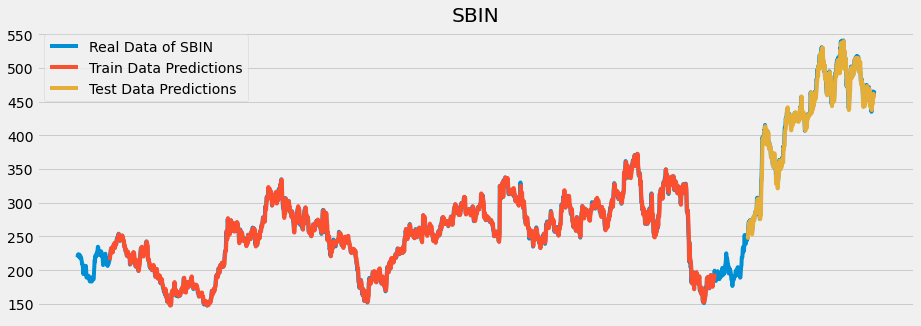

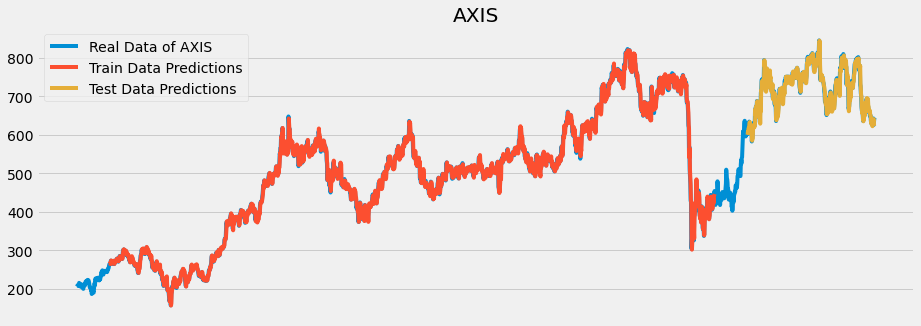

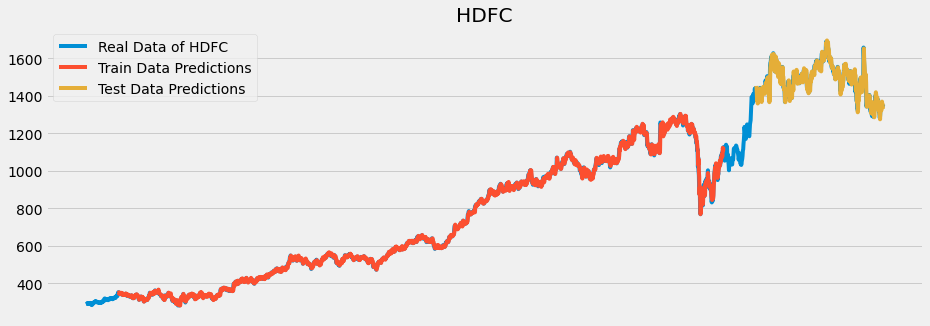

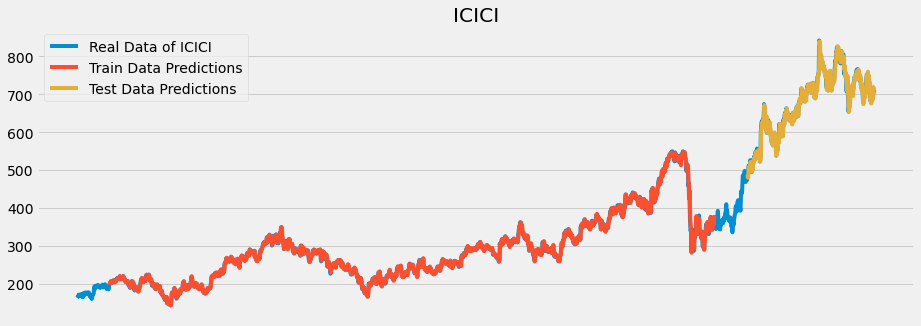

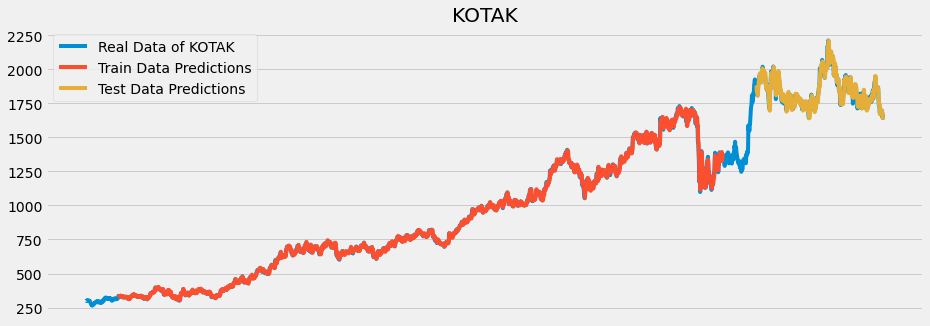

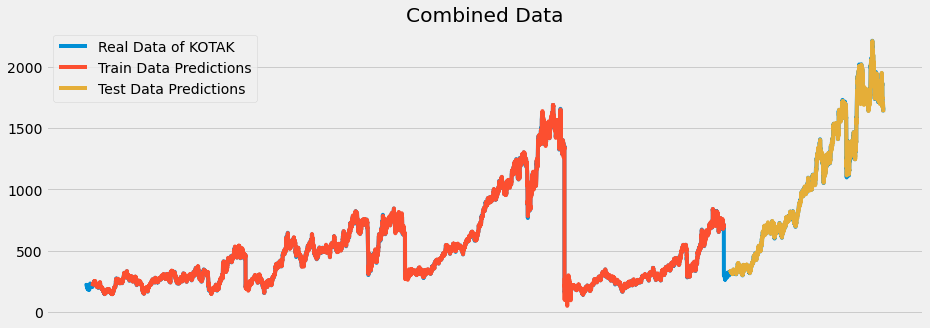

In [18]:
# Plotting 

# Dataset 1

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_1 = np.empty_like(df1)
plotting_train_1[:, :] = np.nan
plotting_train_1[time_step:len(train_predict_1)+time_step, :] = train_predict_1

plotting_test_1 = np.empty_like(df1)
plotting_test_1[:, :] = np.nan
plotting_test_1[len(train_predict_1)+(time_step*2)+1:len(df1)-1, :] = test_predict_1

plt.plot(scaler_1.inverse_transform(df1))
plt.plot(plotting_train_1)
plt.plot(plotting_test_1)
plt.title("SBIN")
plt.legend(['Real Data of SBIN', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

# Dataset 2

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_2 = np.empty_like(df2)
plotting_train_2[:, :] = np.nan
plotting_train_2[time_step:len(train_predict_2)+time_step, :] = train_predict_2

plotting_test_2 = np.empty_like(df2)
plotting_test_2[:, :] = np.nan
plotting_test_2[len(train_predict_2)+(time_step*2)+1:len(df2)-1, :] = test_predict_2

plt.plot(scaler_2.inverse_transform(df2))
plt.plot(plotting_train_2)
plt.plot(plotting_test_2)
plt.title("AXIS")
plt.legend(['Real Data of AXIS', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

# Dataset 3

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_3 = np.empty_like(df3)
plotting_train_3[:, :] = np.nan
plotting_train_3[time_step:len(train_predict_3)+time_step, :] = train_predict_3

plotting_test_3 = np.empty_like(df3)
plotting_test_3[:, :] = np.nan
plotting_test_3[len(train_predict_3)+(time_step*2)+1:len(df3)-1, :] = test_predict_3

plt.plot(scaler_3.inverse_transform(df3))
plt.plot(plotting_train_3)
plt.plot(plotting_test_3)
plt.title("HDFC")
plt.legend(['Real Data of HDFC', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

# Dataset 4

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_4 = np.empty_like(df4)
plotting_train_4[:, :] = np.nan
plotting_train_4[time_step:len(train_predict_4)+time_step, :] = train_predict_4

plotting_test_4 = np.empty_like(df4)
plotting_test_4[:, :] = np.nan
plotting_test_4[len(train_predict_4)+(time_step*2)+1:len(df4)-1, :] = test_predict_4

plt.plot(scaler_4.inverse_transform(df4))
plt.plot(plotting_train_4)
plt.plot(plotting_test_4)
plt.title("ICICI")
plt.legend(['Real Data of ICICI', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

# Dataset 5

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_5 = np.empty_like(df5)
plotting_train_5[:, :] = np.nan
plotting_train_5[time_step:len(train_predict_5)+time_step, :] = train_predict_5

plotting_test_5 = np.empty_like(df5)
plotting_test_5[:, :] = np.nan
plotting_test_5[len(train_predict_5)+(time_step*2)+1:len(df5)-1, :] = test_predict_5

plt.plot(scaler_5.inverse_transform(df5))
plt.plot(plotting_train_5)
plt.plot(plotting_test_5)
plt.title("KOTAK")
plt.legend(['Real Data of KOTAK', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

# Dataset 6

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_6 = np.empty_like(df6)
plotting_train_6[:, :] = np.nan
plotting_train_6[time_step:len(train_predict_6)+time_step, :] = train_predict_6

plotting_test_6 = np.empty_like(df6)
plotting_test_6[:, :] = np.nan
plotting_test_6[len(train_predict_6)+(time_step*2)+1:len(df6)-1, :] = test_predict_6

plt.plot(scaler_6.inverse_transform(df6))
plt.plot(plotting_train_6)
plt.plot(plotting_test_6)
plt.title("Combined Data")
plt.legend(['Real Data of KOTAK', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

#### Difference of last closing price

In [19]:
# Difference

print("\n\n======================")
print("  LAST CLOSING PRICE")
print("======================\n\n")
x = PrettyTable()

x.field_names = ["Bank", "Actual Price", "Predicted Price", "Difference (%)"]

dif1 = round((test_predict_1[-1][0] / scaler_1.inverse_transform(df1)[-1][0])*100-100,2)
x.add_row(["SBIN", round(scaler_1.inverse_transform(df1)[-1][0],2), round(test_predict_1[-1][0],2), dif1])

dif2 = round((test_predict_2[-1][0] / scaler_2.inverse_transform(df2)[-1][0])*100-100,2)
x.add_row(["AXIS", round(scaler_2.inverse_transform(df2)[-1][0],2), round(test_predict_2[-1][0],2), dif2])

dif3 = round((test_predict_3[-1][0] / scaler_3.inverse_transform(df3)[-1][0])*100-100,2)
x.add_row(["HDFC", round(scaler_3.inverse_transform(df3)[-1][0],2), round(test_predict_3[-1][0],2), dif3])

dif4 = round((test_predict_4[-1][0] / scaler_4.inverse_transform(df4)[-1][0])*100-100,2)
x.add_row(["ICICI", round(scaler_4.inverse_transform(df4)[-1][0],2), round(test_predict_4[-1][0],2), dif4])

dif5 = round((test_predict_5[-1][0] / scaler_5.inverse_transform(df5)[-1][0])*100-100,2)
x.add_row(["KOTAK", round(scaler_5.inverse_transform(df5)[-1][0],2), round(test_predict_5[-1][0],2), dif5])

dif6 = round((test_predict_6[-1][0] / scaler_6.inverse_transform(df6)[-1][0])*100-100,2)
x.add_row(["Combined Data", round(scaler_6.inverse_transform(df6)[-1][0],2), round(test_predict_6[-1][0],2), dif6])

print(x)



  LAST CLOSING PRICE


+---------------+--------------+-----------------+----------------+
|      Bank     | Actual Price | Predicted Price | Difference (%) |
+---------------+--------------+-----------------+----------------+
|      SBIN     |    466.85    |      458.18     |     -1.86      |
|      AXIS     |    643.95    |      622.98     |     -3.26      |
|      HDFC     |   1353.75    |     1329.59     |     -1.78      |
|     ICICI     |    703.9     |      704.65     |      0.11      |
|     KOTAK     |   1667.75    |     1629.62     |     -2.29      |
| Combined Data |   1667.75    |     1629.58     |     -2.29      |
+---------------+--------------+-----------------+----------------+


### Step 17: Reshape Datasets for LSTM

In [20]:
# Reshape Datasets

X_train_1 = X_train_1.reshape(X_train_1.shape[0], X_train_1.shape[1], 1)
X_test_1 = X_test_1.reshape(X_test_1.shape[0], X_test_1.shape[1], 1)

X_train_2 = X_train_2.reshape(X_train_2.shape[0], X_train_2.shape[1], 1)
X_test_2 = X_test_2.reshape(X_test_2.shape[0], X_test_2.shape[1], 1)

X_train_3 = X_train_3.reshape(X_train_3.shape[0], X_train_3.shape[1], 1)
X_test_3 = X_test_3.reshape(X_test_3.shape[0], X_test_3.shape[1], 1)

X_train_4 = X_train_4.reshape(X_train_4.shape[0], X_train_4.shape[1], 1)
X_test_4 = X_test_4.reshape(X_test_4.shape[0], X_test_4.shape[1], 1)

X_train_5 = X_train_5.reshape(X_train_5.shape[0], X_train_5.shape[1], 1)
X_test_5 = X_test_5.reshape(X_test_5.shape[0], X_test_5.shape[1], 1)

X_train_6 = X_train_6.reshape(X_train_6.shape[0], X_train_6.shape[1], 1)
X_test_6 = X_test_6.reshape(X_test_6.shape[0], X_test_6.shape[1], 1)

### Step 18: Building Model 3 (LSTM)

In [21]:
# Build Model

# Bank 1

model_1 =Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(time_step,1)))
model_1.add(LSTM(50, return_sequences=True)) 
model_1.add(LSTM(50))
model_1.add(Dense(1))
model_1.compile(loss='mean_squared_error',optimizer='adam')

# Bank 2

model_2 =Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(time_step,1)))
model_2.add(LSTM(50, return_sequences=True))
model_2.add(LSTM(50))
model_2.add(Dense(1))
model_2.compile(loss='mean_squared_error',optimizer='adam')

# Bank 3

model_3 =Sequential()
model_3.add(LSTM(50, return_sequences=True, input_shape=(time_step,1)))
model_3.add(LSTM(50, return_sequences=True))
model_3.add(LSTM(50))
model_3.add(Dense(1))
model_3.compile(loss='mean_squared_error',optimizer='adam')

# Bank 4

model_4 =Sequential()
model_4.add(LSTM(50, return_sequences=True, input_shape=(time_step,1)))
model_4.add(LSTM(50, return_sequences=True))
model_4.add(LSTM(50))
model_4.add(Dense(1))
model_4.compile(loss='mean_squared_error',optimizer='adam')

# Bank 5

model_5 =Sequential()
model_5.add(LSTM(50, return_sequences=True, input_shape=(time_step,1)))
model_5.add(LSTM(50, return_sequences=True))
model_5.add(LSTM(50))
model_5.add(Dense(1))
model_5.compile(loss='mean_squared_error',optimizer='adam')

# Combined Data

model_6 =Sequential()
model_6.add(LSTM(50, return_sequences=True, input_shape=(time_step,1)))
model_6.add(LSTM(50, return_sequences=True))
model_6.add(LSTM(50))
model_6.add(Dense(1))
model_6.compile(loss='mean_squared_error',optimizer='adam')
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_16 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Step 19: Train LSTM Model

In [22]:
# Train Models

model_1.fit(X_train_1, y_train_1, validation_data=(X_test_1, y_test_1), epochs=25, batch_size=64, verbose=1)
model_2.fit(X_train_2, y_train_2, validation_data=(X_test_2, y_test_2), epochs=25, batch_size=64, verbose=1)
model_3.fit(X_train_3, y_train_3, validation_data=(X_test_3, y_test_3), epochs=25, batch_size=64, verbose=1)
model_4.fit(X_train_4, y_train_4, validation_data=(X_test_4, y_test_4), epochs=25, batch_size=64, verbose=1)
model_5.fit(X_train_5, y_train_5, validation_data=(X_test_5, y_test_5), epochs=25, batch_size=64, verbose=1)
model_5.fit(X_train_5, y_train_5, validation_data=(X_test_5, y_test_5), epochs=25, batch_size=64, verbose=1)

Epoch 1/25
30/30 [==============================] - 6s 188ms/step - loss: 0.0094 - val_loss: 0.0317
Epoch 2/25
30/30 [==============================] - 4s 129ms/step - loss: 0.0020 - val_loss: 0.0052
Epoch 3/25
30/30 [==============================] - 4s 130ms/step - loss: 0.0017 - val_loss: 0.0069
Epoch 4/25
30/30 [==============================] - 4s 132ms/step - loss: 0.0015 - val_loss: 0.0085
Epoch 5/25
30/30 [==============================] - 4s 132ms/step - loss: 0.0015 - val_loss: 0.0135
Epoch 6/25
30/30 [==============================] - 4s 133ms/step - loss: 0.0013 - val_loss: 0.0056
Epoch 7/25
30/30 [==============================] - 4s 133ms/step - loss: 0.0012 - val_loss: 0.0136
Epoch 8/25
30/30 [==============================] - 4s 134ms/step - loss: 0.0011 - val_loss: 0.0064
Epoch 9/25
30/30 [==============================] - 4s 133ms/step - loss: 0.0011 - val_loss: 0.0071
Epoch 10/25
30/30 [==============================] - 4s 134ms/step - loss: 0.0010 - val_loss: 0.0098

30/30 [==============================] - 4s 144ms/step - loss: 6.2294e-04 - val_loss: 0.0033
Epoch 6/25
30/30 [==============================] - 4s 145ms/step - loss: 5.2769e-04 - val_loss: 0.0042
Epoch 7/25
30/30 [==============================] - 4s 144ms/step - loss: 4.8170e-04 - val_loss: 0.0035
Epoch 8/25
30/30 [==============================] - 4s 149ms/step - loss: 4.4817e-04 - val_loss: 0.0015
Epoch 9/25
30/30 [==============================] - 4s 143ms/step - loss: 4.4187e-04 - val_loss: 0.0052
Epoch 10/25
30/30 [==============================] - 4s 144ms/step - loss: 4.0844e-04 - val_loss: 0.0015
Epoch 11/25
30/30 [==============================] - 4s 143ms/step - loss: 3.6182e-04 - val_loss: 0.0058
Epoch 12/25
30/30 [==============================] - 4s 144ms/step - loss: 3.3704e-04 - val_loss: 0.0019
Epoch 13/25
30/30 [==============================] - 4s 143ms/step - loss: 3.4044e-04 - val_loss: 0.0032
Epoch 14/25
30/30 [==============================] - 4s 143ms/step - lo

### Step 20: Get Predictions with LSTM

In [23]:
# Predictions of Data 1

train_predict_1 = model_1.predict(X_train_1)
test_predict_1 = model_1.predict(X_test_1)
train_predict_1 = scaler_1.inverse_transform(train_predict_1)
test_predict_1 = scaler_1.inverse_transform(test_predict_1)

# Predictions of Data 2

train_predict_2 = model_2.predict(X_train_2)
test_predict_2 = model_2.predict(X_test_2)
train_predict_2 = scaler_2.inverse_transform(train_predict_2)
test_predict_2 = scaler_2.inverse_transform(test_predict_2)

# Predictions of Data 3

train_predict_3 = model_3.predict(X_train_3)
test_predict_3 = model_3.predict(X_test_3)
train_predict_3 = scaler_3.inverse_transform(train_predict_3)
test_predict_3 = scaler_3.inverse_transform(test_predict_3)

# Predictions of Data 4

train_predict_4 = model_4.predict(X_train_4)
test_predict_4 = model_4.predict(X_test_4)
train_predict_4 = scaler_4.inverse_transform(train_predict_4)
test_predict_4 = scaler_4.inverse_transform(test_predict_4)

# Predictions of Data 5

train_predict_5 = model_5.predict(X_train_5)
test_predict_5 = model_5.predict(X_test_5)
train_predict_5 = scaler_5.inverse_transform(train_predict_5)
test_predict_5 = scaler_5.inverse_transform(test_predict_5)

# Predictions of Data 6

train_predict_6 = model_6.predict(X_train_6)
test_predict_6 = model_6.predict(X_test_6)
train_predict_6 = scaler_6.inverse_transform(train_predict_6)
test_predict_6 = scaler_6.inverse_transform(test_predict_6)

### Step 21: Calculate Error of LSTM

In [24]:
# Mean Squared Error

# Dataset 1

train_error_1 = math.sqrt(mean_squared_error(y_train_1, train_predict_1))
test_error_1 = math.sqrt(mean_squared_error(y_test_1, test_predict_1))
print("\n===========================")
print("Training Dataset 1:", round(train_error_1,2))
print("Testing Dataset 1: ", round(test_error_1,2))

# Dataset 2

train_error_2 = math.sqrt(mean_squared_error(y_train_2, train_predict_2))
test_error_2 = math.sqrt(mean_squared_error(y_test_2, test_predict_2))
print("\n===========================")
print("Training Dataset 2:", round(train_error_2,2))
print("Testing Dataset 2: ", round(test_error_2,2))

# Dataset 3

train_error_3 = math.sqrt(mean_squared_error(y_train_3, train_predict_3))
test_error_3 = math.sqrt(mean_squared_error(y_test_3, test_predict_3))
print("\n===========================")
print("Training Dataset 3:", round(train_error_3,2))
print("Testing Dataset 3: ", round(test_error_3,2))

# Dataset 4

train_error_4 = math.sqrt(mean_squared_error(y_train_4, train_predict_4))
test_error_4 = math.sqrt(mean_squared_error(y_test_4, test_predict_4))
print("\n===========================")
print("Training Dataset 4:", round(train_error_4,2))
print("Testing Dataset 4: ", round(test_error_4,2))

# Dataset 5

train_error_5 = math.sqrt(mean_squared_error(y_train_5, train_predict_5))
test_error_5 = math.sqrt(mean_squared_error(y_test_5, test_predict_5))
print("\n===========================")
print("Training Dataset 5:", round(train_error_5,2))
print("Testing Dataset 5: ", round(test_error_5,2))

# Dataset 6

train_error_6 = math.sqrt(mean_squared_error(y_train_6, train_predict_6))
test_error_6 = math.sqrt(mean_squared_error(y_test_6, test_predict_6))
print("\n===========================")
print("Training Dataset 6:", round(train_error_6,2))
print("Testing Dataset 6: ", round(test_error_6,2))


Training Dataset 1: 253.98
Testing Dataset 1:  412.06

Training Dataset 2: 511.2
Testing Dataset 2:  719.19

Training Dataset 3: 766.21
Testing Dataset 3:  1421.71

Training Dataset 4: 294.82
Testing Dataset 4:  654.99

Training Dataset 5: 944.1
Testing Dataset 5:  1805.36

Training Dataset 6: 182.53
Testing Dataset 6:  240.65


### Step 22: Plotting Prediction of LSTM

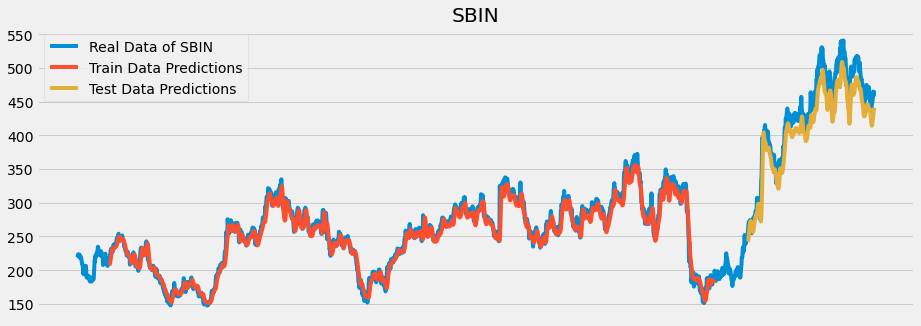

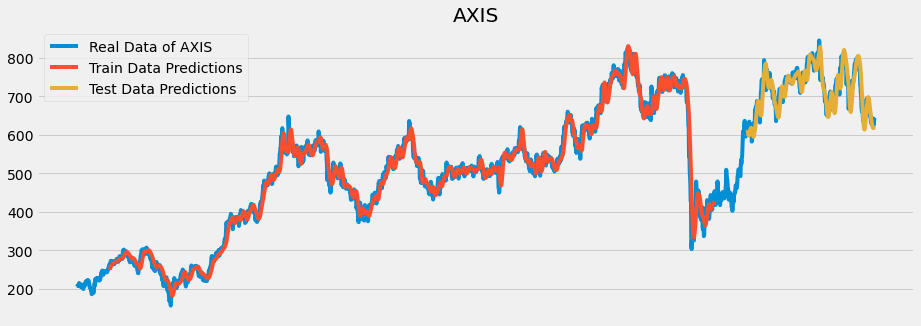

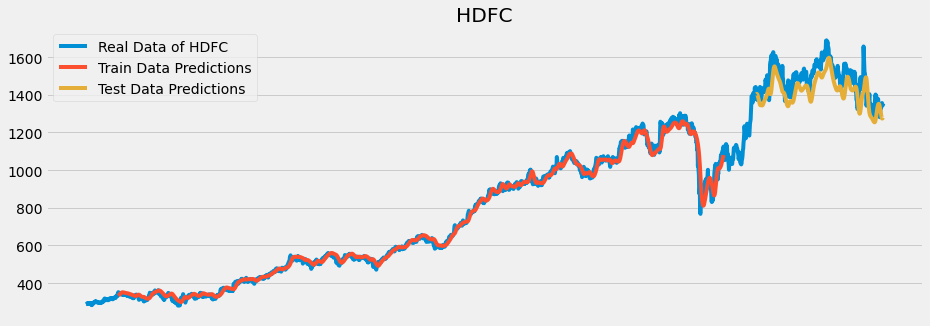

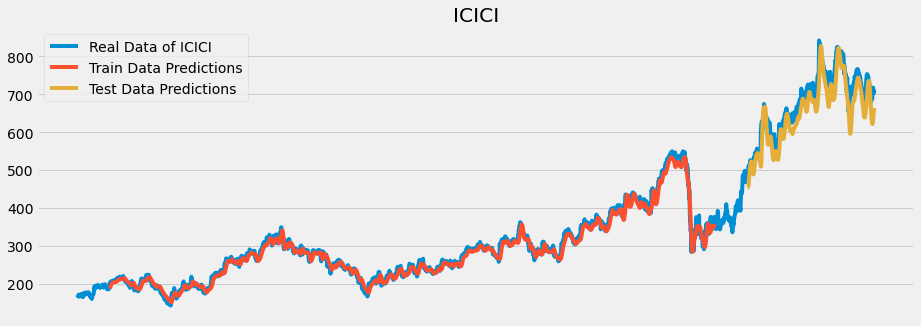

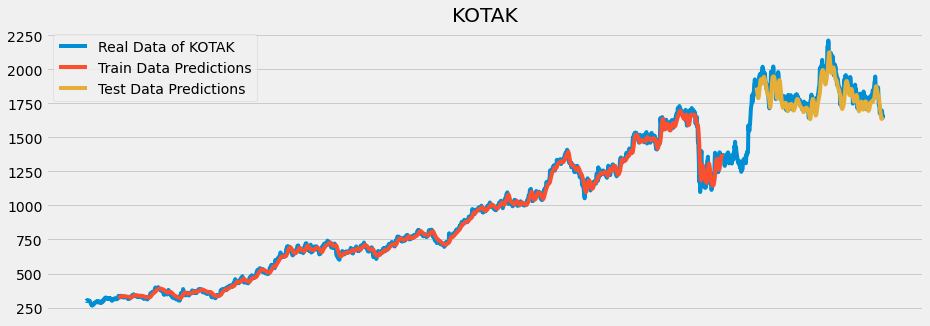

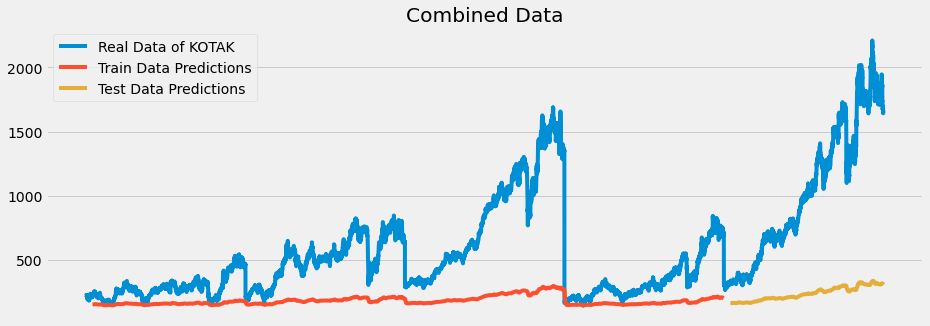

In [25]:
# Plotting 

# Dataset 1

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_1 = np.empty_like(df1)
plotting_train_1[:, :] = np.nan
plotting_train_1[time_step:len(train_predict_1)+time_step, :] = train_predict_1

plotting_test_1 = np.empty_like(df1)
plotting_test_1[:, :] = np.nan
plotting_test_1[len(train_predict_1)+(time_step*2)+1:len(df1)-1, :] = test_predict_1

plt.plot(scaler_1.inverse_transform(df1))
plt.plot(plotting_train_1)
plt.plot(plotting_test_1)
plt.title("SBIN")
plt.legend(['Real Data of SBIN', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

# Dataset 2

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_2 = np.empty_like(df2)
plotting_train_2[:, :] = np.nan
plotting_train_2[time_step:len(train_predict_2)+time_step, :] = train_predict_2

plotting_test_2 = np.empty_like(df2)
plotting_test_2[:, :] = np.nan
plotting_test_2[len(train_predict_2)+(time_step*2)+1:len(df2)-1, :] = test_predict_2

plt.plot(scaler_2.inverse_transform(df2))
plt.plot(plotting_train_2)
plt.plot(plotting_test_2)
plt.title("AXIS")
plt.legend(['Real Data of AXIS', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

# Dataset 3

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_3 = np.empty_like(df3)
plotting_train_3[:, :] = np.nan
plotting_train_3[time_step:len(train_predict_3)+time_step, :] = train_predict_3

plotting_test_3 = np.empty_like(df3)
plotting_test_3[:, :] = np.nan
plotting_test_3[len(train_predict_3)+(time_step*2)+1:len(df2)-1, :] = test_predict_3

plt.plot(scaler_3.inverse_transform(df3))
plt.plot(plotting_train_3)
plt.plot(plotting_test_3)
plt.title("HDFC")
plt.legend(['Real Data of HDFC', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

# Dataset 4

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_4 = np.empty_like(df4)
plotting_train_4[:, :] = np.nan
plotting_train_4[time_step:len(train_predict_4)+time_step, :] = train_predict_4

plotting_test_4 = np.empty_like(df4)
plotting_test_4[:, :] = np.nan
plotting_test_4[len(train_predict_4)+(time_step*2)+1:len(df2)-1, :] = test_predict_4

plt.plot(scaler_4.inverse_transform(df4))
plt.plot(plotting_train_4)
plt.plot(plotting_test_4)
plt.title("ICICI")
plt.legend(['Real Data of ICICI', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

# Dataset 5

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_5 = np.empty_like(df5)
plotting_train_5[:, :] = np.nan
plotting_train_5[time_step:len(train_predict_5)+time_step, :] = train_predict_5

plotting_test_5 = np.empty_like(df5)
plotting_test_5[:, :] = np.nan
plotting_test_5[len(train_predict_5)+(time_step*2)+1:len(df2)-1, :] = test_predict_5

plt.plot(scaler_5.inverse_transform(df5))
plt.plot(plotting_train_5)
plt.plot(plotting_test_5)
plt.title("KOTAK")
plt.legend(['Real Data of KOTAK', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

# Dataset 6

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5)
plotting_train_6 = np.empty_like(df6)
plotting_train_6[:, :] = np.nan
plotting_train_6[time_step:len(train_predict_6)+time_step, :] = train_predict_6

plotting_test_6 = np.empty_like(df6)
plotting_test_6[:, :] = np.nan
plotting_test_6[len(train_predict_6)+(time_step*2)+1:len(df6)-1, :] = test_predict_6

plt.plot(scaler_6.inverse_transform(df6))
plt.plot(plotting_train_6)
plt.plot(plotting_test_6)
plt.title("Combined Data")
plt.legend(['Real Data of KOTAK', 'Train Data Predictions', 'Test Data Predictions'])
plt.xticks([])
plt.show()

#### Difference of last closing price

In [26]:
# Difference

print("\n\n======================")
print("  LAST CLOSING PRICE")
print("======================\n\n")
x = PrettyTable()

x.field_names = ["Bank", "Actual Price", "Predicted Price", "Difference (%)"]

dif1 = round((test_predict_1[-1][0] / scaler_1.inverse_transform(df1)[-1][0])*100-100,2)
x.add_row(["SBIN", round(scaler_1.inverse_transform(df1)[-1][0],2), round(test_predict_1[-1][0],2), dif1])

dif2 = round((test_predict_2[-1][0] / scaler_2.inverse_transform(df2)[-1][0])*100-100,2)
x.add_row(["AXIS", round(scaler_2.inverse_transform(df2)[-1][0],2), round(test_predict_2[-1][0],2), dif2])

dif3 = round((test_predict_3[-1][0] / scaler_3.inverse_transform(df3)[-1][0])*100-100,2)
x.add_row(["HDFC", round(scaler_3.inverse_transform(df3)[-1][0],2), round(test_predict_3[-1][0],2), dif3])

dif4 = round((test_predict_4[-1][0] / scaler_4.inverse_transform(df4)[-1][0])*100-100,2)
x.add_row(["ICICI", round(scaler_4.inverse_transform(df4)[-1][0],2), round(test_predict_4[-1][0],2), dif4])

dif5 = round((test_predict_5[-1][0] / scaler_5.inverse_transform(df5)[-1][0])*100-100,2)
x.add_row(["KOTAK", round(scaler_5.inverse_transform(df5)[-1][0],2), round(test_predict_5[-1][0],2), dif5])

dif6 = round((test_predict_6[-1][0] / scaler_6.inverse_transform(df6)[-1][0])*100-100,2)
x.add_row(["Combined Data", round(scaler_6.inverse_transform(df6)[-1][0],2), round(test_predict_6[-1][0],2), dif6])

print(x)



  LAST CLOSING PRICE


+---------------+--------------+-----------------+----------------+
|      Bank     | Actual Price | Predicted Price | Difference (%) |
+---------------+--------------+-----------------+----------------+
|      SBIN     |    466.85    |      440.7      |      -5.6      |
|      AXIS     |    643.95    |      621.42     |      -3.5      |
|      HDFC     |   1353.75    |     1279.02     |     -5.52      |
|     ICICI     |    703.9     |      663.7      |     -5.71      |
|     KOTAK     |   1667.75    |     1654.01     |     -0.82      |
| Combined Data |   1667.75    |      303.71     |     -81.79     |
+---------------+--------------+-----------------+----------------+


### Step 23: Forecast Next 100 Days Price with LSTM

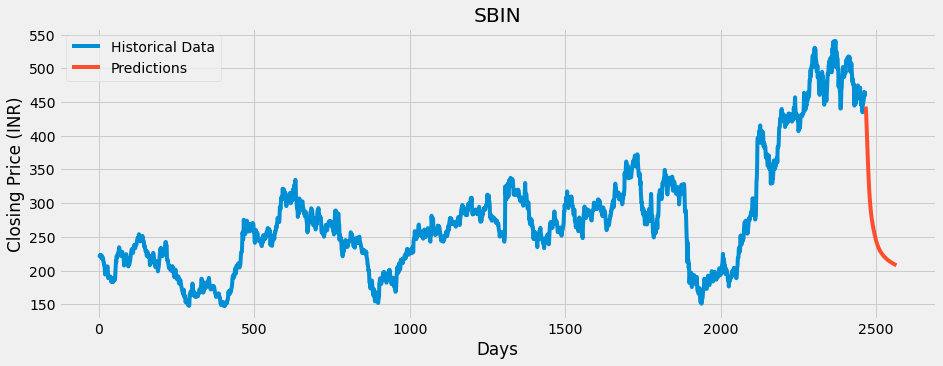

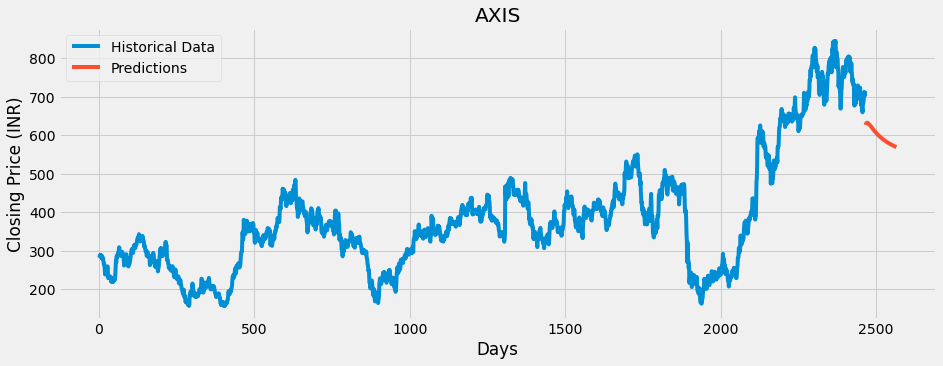

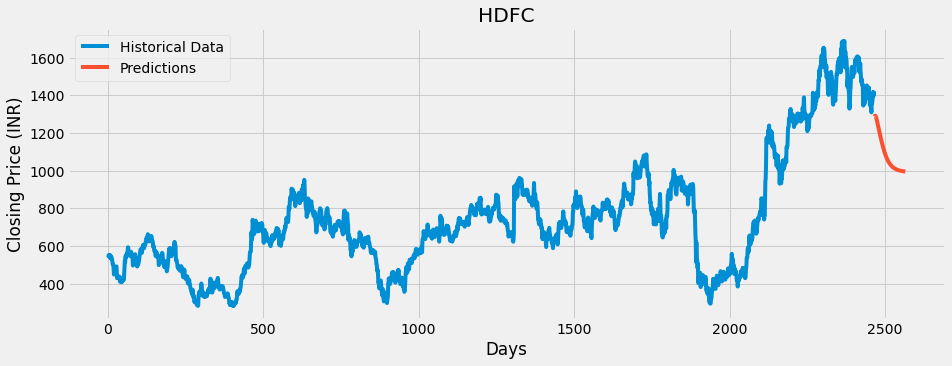

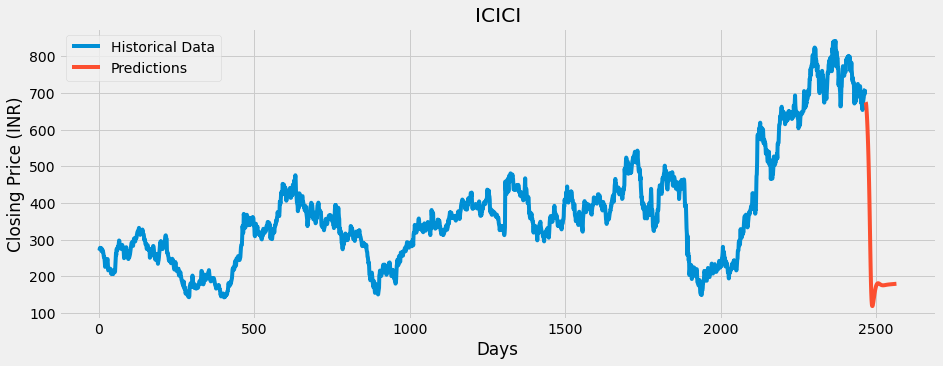

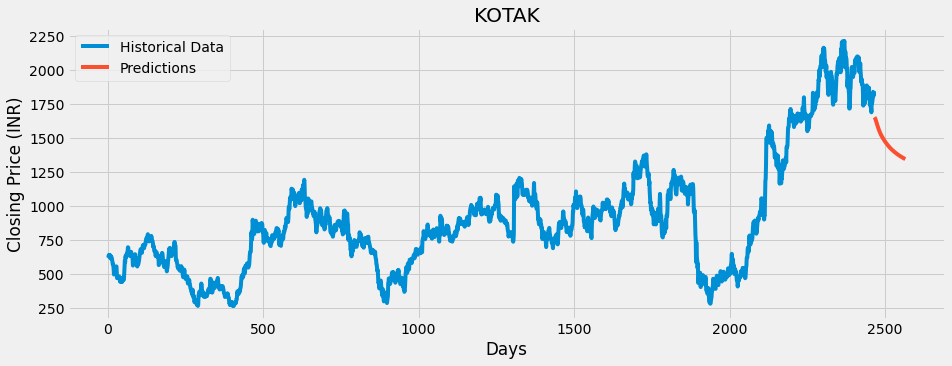

In [27]:
# Forecasting

x_input_1 = test_data_1[393:].reshape(1,-1)
temp_input_1 = list(x_input_1)
temp_input_1 = temp_input_1[0].tolist()

lst_output_1 = []
n_steps = 100
i = 0
while(i < 100):
    if(len(temp_input_1) > 100):
        x_input_1 = np.array(temp_input_1[1:])
        x_input_1 = x_input_1.reshape(1,-1)
        x_input_1 = x_input_1.reshape((1, n_steps, 1))
        yhat = model_1.predict(x_input_1)
        temp_input_1.extend(yhat[0].tolist())
        temp_input_1 = temp_input_1[1:]
        lst_output_1.extend(yhat.tolist())
        i=i+1
    else:
        x_input_1 = x_input_1.reshape((1, n_steps,1))
        yhat = model_1.predict(x_input_1)
        temp_input_1.extend(yhat[0].tolist())
        lst_output_1.extend(yhat.tolist())
        i=i+1
        
day_new_1 = np.arange(1,2466)
day_pred_1 = np.arange(2466,2566)
plt.plot(day_new_1,scaler_1.inverse_transform(df1).reshape(-1))
plt.plot(day_pred_1,scaler_1.inverse_transform(lst_output_1))
plt.legend(["Historical Data", "Predictions"])
plt.title("SBIN")
plt.ylabel("Closing Price (INR)")
plt.xlabel("Days")
plt.show()

# Forecasting

x_input_2 = test_data_2[393:].reshape(1,-1)
temp_input_2 = list(x_input_2)
temp_input_2 = temp_input_2[0].tolist()

lst_output_2 = []
n_steps = 100
i = 0
while(i < 100):
    if(len(temp_input_2) > 100):
        x_input_2 = np.array(temp_input_2[1:])
        x_input_2 = x_input_2.reshape(1,-1)
        x_input_2 = x_input_2.reshape((1, n_steps, 1))
        yhat = model_2.predict(x_input_2)
        temp_input_2.extend(yhat[0].tolist())
        temp_input_2 = temp_input_2[1:]
        lst_output_2.extend(yhat.tolist())
        i=i+1
    else:
        x_input_2 = x_input_2.reshape((1, n_steps,1))
        yhat = model_2.predict(x_input_2)
        temp_input_2.extend(yhat[0].tolist())
        lst_output_2.extend(yhat.tolist())
        i=i+1
        
day_new_2 = np.arange(1,2466)
day_pred_2 = np.arange(2466,2566)
plt.plot(day_new_2,scaler_2.inverse_transform(df1).reshape(-1))
plt.plot(day_pred_2,scaler_2.inverse_transform(lst_output_2))
plt.legend(["Historical Data", "Predictions"])
plt.title("AXIS")
plt.ylabel("Closing Price (INR)")
plt.xlabel("Days")
plt.show()

# Forecasting

x_input_3 = test_data_3[393:].reshape(1,-1)
temp_input_3 = list(x_input_3)
temp_input_3 = temp_input_3[0].tolist()

lst_output_3 = []
n_steps = 100
i = 0
while(i < 100):
    if(len(temp_input_3) > 100):
        x_input_3 = np.array(temp_input_3[1:])
        x_input_3 = x_input_3.reshape(1,-1)
        x_input_3 = x_input_3.reshape((1, n_steps, 1))
        yhat = model_3.predict(x_input_3)
        temp_input_3.extend(yhat[0].tolist())
        temp_input_3 = temp_input_3[1:]
        lst_output_3.extend(yhat.tolist())
        i=i+1
    else:
        x_input_3 = x_input_3.reshape((1, n_steps,1))
        yhat = model_3.predict(x_input_3)
        temp_input_3.extend(yhat[0].tolist())
        lst_output_3.extend(yhat.tolist())
        i=i+1
        
day_new_3 = np.arange(1,2466)
day_pred_3 = np.arange(2466,2566)
plt.plot(day_new_3,scaler_3.inverse_transform(df1).reshape(-1))
plt.plot(day_pred_3,scaler_3.inverse_transform(lst_output_3))
plt.legend(["Historical Data", "Predictions"])
plt.title("HDFC")
plt.ylabel("Closing Price (INR)")
plt.xlabel("Days")
plt.show()

# Forecasting

x_input_4 = test_data_4[393:].reshape(1,-1)
temp_input_4 = list(x_input_4)
temp_input_4 = temp_input_4[0].tolist()

lst_output_4 = []
n_steps = 100
i = 0
while(i < 100):
    if(len(temp_input_4) > 100):
        x_input_4 = np.array(temp_input_4[1:])
        x_input_4 = x_input_4.reshape(1,-1)
        x_input_4 = x_input_4.reshape((1, n_steps, 1))
        yhat = model_4.predict(x_input_4)
        temp_input_4.extend(yhat[0].tolist())
        temp_input_4 = temp_input_4[1:]
        lst_output_4.extend(yhat.tolist())
        i=i+1
    else:
        x_input_4 = x_input_4.reshape((1, n_steps,1))
        yhat = model_4.predict(x_input_4)
        temp_input_4.extend(yhat[0].tolist())
        lst_output_4.extend(yhat.tolist())
        i=i+1
        
day_new_4 = np.arange(1,2466)
day_pred_4 = np.arange(2466,2566)
plt.plot(day_new_4,scaler_4.inverse_transform(df1).reshape(-1))
plt.plot(day_pred_4,scaler_4.inverse_transform(lst_output_4))
plt.legend(["Historical Data", "Predictions"])
plt.title("ICICI")
plt.ylabel("Closing Price (INR)")
plt.xlabel("Days")
plt.show()

# Forecasting

x_input_5 = test_data_5[393:].reshape(1,-1)
temp_input_5 = list(x_input_5)
temp_input_5 = temp_input_5[0].tolist()

lst_output_5 = []
n_steps = 100
i = 0
while(i < 100):
    if(len(temp_input_5) > 100):
        x_input_5 = np.array(temp_input_5[1:])
        x_input_5 = x_input_5.reshape(1,-1)
        x_input_5 = x_input_5.reshape((1, n_steps, 1))
        yhat = model_5.predict(x_input_5)
        temp_input_5.extend(yhat[0].tolist())
        temp_input_5 = temp_input_5[1:]
        lst_output_5.extend(yhat.tolist())
        i=i+1
    else:
        x_input_5 = x_input_5.reshape((1, n_steps,1))
        yhat = model_5.predict(x_input_5)
        temp_input_5.extend(yhat[0].tolist())
        lst_output_5.extend(yhat.tolist())
        i=i+1
        
day_new_5 = np.arange(1,2466)
day_pred_5 = np.arange(2466,2566)
plt.plot(day_new_5,scaler_5.inverse_transform(df1).reshape(-1))
plt.plot(day_pred_5,scaler_5.inverse_transform(lst_output_5))
plt.legend(["Historical Data", "Predictions"])
plt.title("KOTAK")
plt.ylabel("Closing Price (INR)")
plt.xlabel("Days")
plt.show()

### Step 24: Forecast Next 100 Days Price with Linear Regression

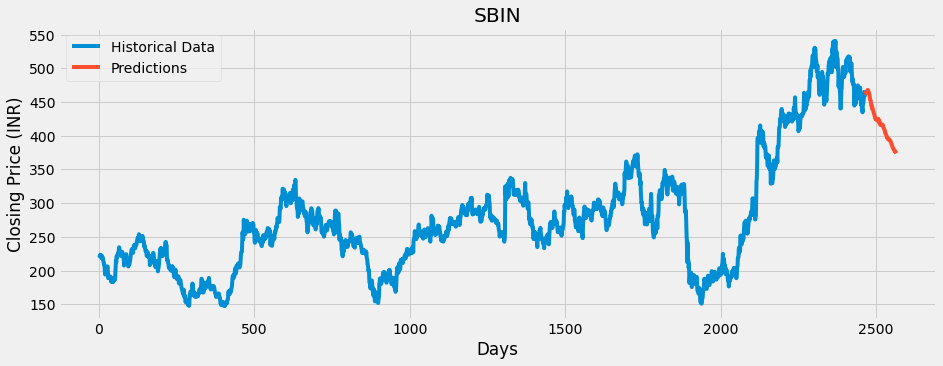

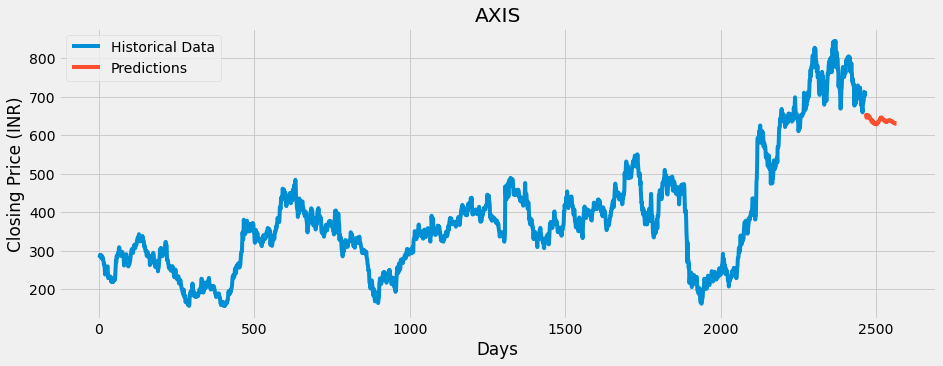

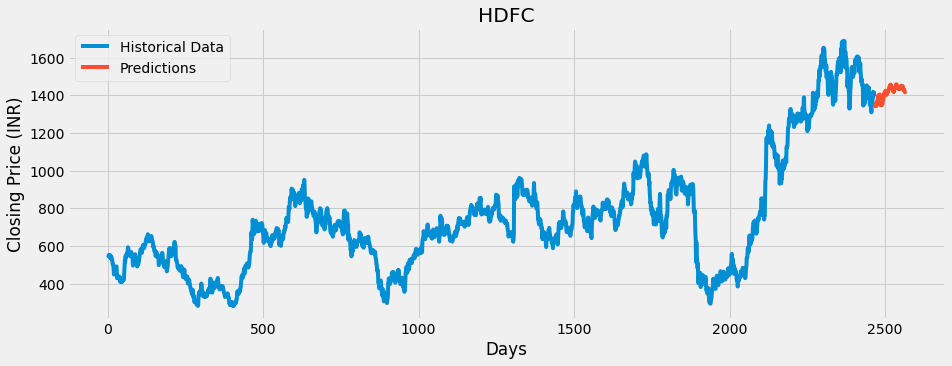

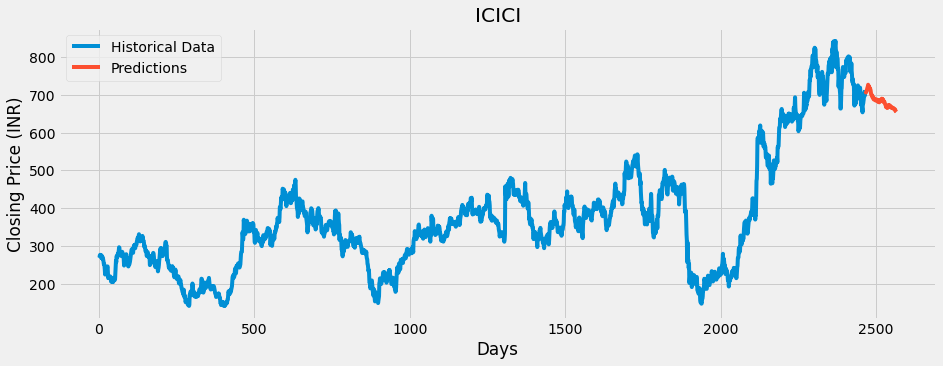

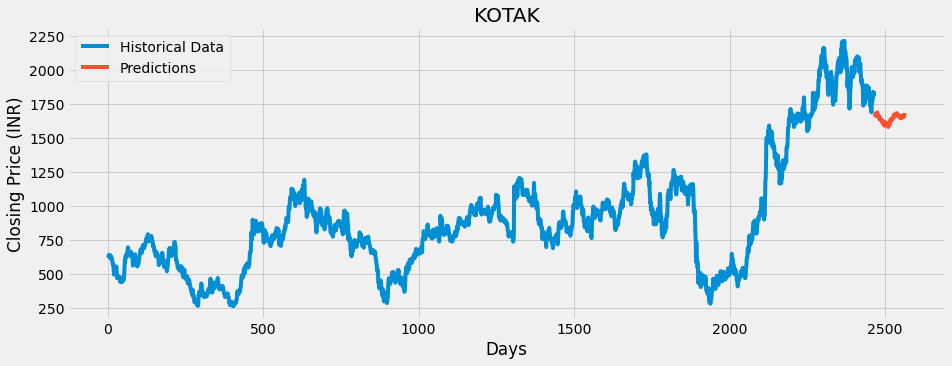

In [28]:
# Forecasting

x_input_1 = test_data_1[393:].reshape(1,-1)
temp_input_1 = list(x_input_1)
temp_input_1 = temp_input_1[0].tolist()

lst_output_1 = []
n_steps = 100
i = 0
while(i < 100):
    if(len(temp_input_1) > 100):
        x_input_1 = np.array(temp_input_1[1:])
        x_input_1 = x_input_1.reshape(1,-1)
        x_input_1 = x_input_1.reshape((1, n_steps))
        yhat = lr_1.predict(x_input_1)
        temp_input_1.extend(yhat.tolist())
        temp_input_1 = temp_input_1[1:]
        lst_output_1.extend(yhat.tolist())
        i=i+1
    else:
        x_input_1 = x_input_1.reshape((1, n_steps))
        yhat = lr_1.predict(x_input_1)
        temp_input_1.extend(yhat.tolist())
        lst_output_1.extend(yhat.tolist())
        i=i+1
        
day_new_1 = np.arange(1,2466)
day_pred_1 = np.arange(2466,2566)
plt.plot(day_new_1,scaler_1.inverse_transform(df1).reshape(-1))
plt.plot(day_pred_1,scaler_1.inverse_transform(np.array(lst_output_1).reshape(-1, 1)))
plt.legend(["Historical Data", "Predictions"])
plt.title("SBIN")
plt.ylabel("Closing Price (INR)")
plt.xlabel("Days")
plt.show()

# Forecasting

x_input_2 = test_data_2[393:].reshape(1,-1)
temp_input_2 = list(x_input_2)
temp_input_2 = temp_input_2[0].tolist()

lst_output_2 = []
n_steps = 100
i = 0
while(i < 100):
    if(len(temp_input_2) > 100):
        x_input_2 = np.array(temp_input_2[1:])
        x_input_2 = x_input_2.reshape(1,-1)
        x_input_2 = x_input_2.reshape((1, n_steps))
        yhat = lr_2.predict(x_input_2)
        temp_input_2.extend(yhat.tolist())
        temp_input_2 = temp_input_2[1:]
        lst_output_2.extend(yhat.tolist())
        i=i+1
    else:
        x_input_2 = x_input_2.reshape((1, n_steps))
        yhat = lr_2.predict(x_input_2)
        temp_input_2.extend(yhat.tolist())
        lst_output_2.extend(yhat.tolist())
        i=i+1
        
day_new_2 = np.arange(1,2466)
day_pred_2 = np.arange(2466,2566)
plt.plot(day_new_2,scaler_2.inverse_transform(df1).reshape(-1))
plt.plot(day_pred_2,scaler_2.inverse_transform(np.array(lst_output_2).reshape(-1, 1)))
plt.legend(["Historical Data", "Predictions"])
plt.title("AXIS")
plt.ylabel("Closing Price (INR)")
plt.xlabel("Days")
plt.show()

# Forecasting

x_input_3 = test_data_3[393:].reshape(1,-1)
temp_input_3 = list(x_input_3)
temp_input_3 = temp_input_3[0].tolist()

lst_output_3 = []
n_steps = 100
i = 0
while(i < 100):
    if(len(temp_input_3) > 100):
        x_input_3 = np.array(temp_input_3[1:])
        x_input_3 = x_input_3.reshape(1,-1)
        x_input_3 = x_input_3.reshape((1, n_steps))
        yhat = lr_3.predict(x_input_3)
        temp_input_3.extend(yhat.tolist())
        temp_input_3 = temp_input_3[1:]
        lst_output_3.extend(yhat.tolist())
        i=i+1
    else:
        x_input_3 = x_input_3.reshape((1, n_steps))
        yhat = lr_3.predict(x_input_3)
        temp_input_3.extend(yhat.tolist())
        lst_output_3.extend(yhat.tolist())
        i=i+1
        
day_new_3 = np.arange(1,2466)
day_pred_3 = np.arange(2466,2566)
plt.plot(day_new_3,scaler_3.inverse_transform(df1).reshape(-1))
plt.plot(day_pred_3,scaler_3.inverse_transform(np.array(lst_output_3).reshape(-1, 1)))
plt.legend(["Historical Data", "Predictions"])
plt.title("HDFC")
plt.ylabel("Closing Price (INR)")
plt.xlabel("Days")
plt.show()

# Forecasting

x_input_4 = test_data_4[393:].reshape(1,-1)
temp_input_4 = list(x_input_4)
temp_input_4 = temp_input_4[0].tolist()

lst_output_4 = []
n_steps = 100
i = 0
while(i < 100):
    if(len(temp_input_4) > 100):
        x_input_4 = np.array(temp_input_4[1:])
        x_input_4 = x_input_4.reshape(1,-1)
        x_input_4 = x_input_4.reshape((1, n_steps))
        yhat = lr_4.predict(x_input_4)
        temp_input_4.extend(yhat.tolist())
        temp_input_4 = temp_input_4[1:]
        lst_output_4.extend(yhat.tolist())
        i=i+1
    else:
        x_input_4 = x_input_4.reshape((1, n_steps))
        yhat = lr_4.predict(x_input_4)
        temp_input_4.extend(yhat.tolist())
        lst_output_4.extend(yhat.tolist())
        i=i+1
        
day_new_4 = np.arange(1,2466)
day_pred_4 = np.arange(2466,2566)
plt.plot(day_new_4,scaler_4.inverse_transform(df1).reshape(-1))
plt.plot(day_pred_4,scaler_4.inverse_transform(np.array(lst_output_4).reshape(-1, 1)))
plt.legend(["Historical Data", "Predictions"])
plt.title("ICICI")
plt.ylabel("Closing Price (INR)")
plt.xlabel("Days")
plt.show()

# Forecasting

x_input_5 = test_data_5[393:].reshape(1,-1)
temp_input_5 = list(x_input_5)
temp_input_5 = temp_input_5[0].tolist()

lst_output_5 = []
n_steps = 100
i = 0
while(i < 100):
    if(len(temp_input_5) > 100):
        x_input_5 = np.array(temp_input_5[1:])
        x_input_5 = x_input_5.reshape(1,-1)
        x_input_5 = x_input_5.reshape((1, n_steps))
        yhat = lr_5.predict(x_input_5)
        temp_input_5.extend(yhat.tolist())
        temp_input_5 = temp_input_5[1:]
        lst_output_5.extend(yhat.tolist())
        i=i+1
    else:
        x_input_5 = x_input_5.reshape((1, n_steps))
        yhat = lr_5.predict(x_input_5)
        temp_input_5.extend(yhat.tolist())
        lst_output_5.extend(yhat.tolist())
        i=i+1
        
day_new_5 = np.arange(1,2466)
day_pred_5 = np.arange(2466,2566)
plt.plot(day_new_5,scaler_5.inverse_transform(df1).reshape(-1))
plt.plot(day_pred_5,scaler_5.inverse_transform(np.array(lst_output_5).reshape(-1, 1)))
plt.legend(["Historical Data", "Predictions"])
plt.title("KOTAK")
plt.ylabel("Closing Price (INR)")
plt.xlabel("Days")
plt.show()

<center><br><br>
    <h1>Thank you so much<h2>